# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [8]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import pathlib as Path

In [9]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [10]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [11]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')

In [12]:
# Extract all rows of data
# https://towardsdatascience.com/a-guide-to-scraping-html-tables-with-pandas-and-beautifulsoup-7fc24c331cf7

mars_table = mars_soup.find("table", class_='table')
mars_rows = mars_table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [14]:
# # Create an empty list
mars_climate = []

# # Loop through the scraped data to create a list of rows
# # https://medium.com/geekculture/web-scraping-tables-in-python-using-beautiful-soup-8bbc31c5803e

for row in mars_table.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    
    # Find non-empty cells and convert to appropiate data type
    if(columns != []):
        id = columns[0].text
        terrestrial_date = dt.datetime.strptime(columns[1].text, '%Y-%m-%d').date()
        sol = int(columns[2].text)
        ls = int(columns[3].text)
        month = int(columns[4].text)
        min_temp = float(columns[5].text)
        pressure = float(columns[6].text)

        data_dict = {
            'id' : id,
            'terrestrial_date' : terrestrial_date,
            'sol': sol,
            'ls' :ls,
            'month' : month,
            'min_temp' : min_temp,
            'pressure' : pressure
            }
        mars_climate.append(data_dict)

In [16]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_climate = pd.DataFrame(mars_climate)


In [17]:
# Confirm DataFrame was created successfully
mars_climate.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [18]:
# Examine data type of each column
print(mars_climate.dtypes)

id                   object
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [19]:
# Change data types for data analysis
mars_climate['terrestrial_date'] = pd.to_datetime(mars_climate['terrestrial_date'])

In [20]:
# Confirm type changes were successful by examining data types again
mars_climate.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [21]:
mars_climate.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [22]:
# 1. How many months are there on Mars?
mars_months = mars_climate['month'].value_counts().sort_index()
mars_months


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [23]:
# 2. How many Martian days' worth of data are there?
mars_data_days = mars_climate['sol'].count()
mars_data_days

1867

In [24]:
# 3. What is the average low temperature by month?
mars_ave_min_temp = mars_climate.groupby(['month'])['min_temp'].mean()
mars_ave_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

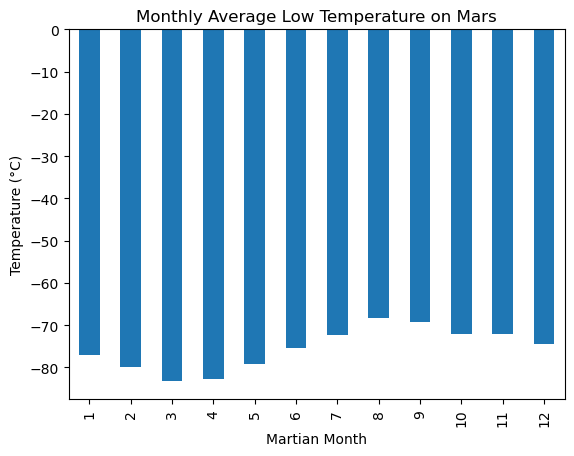

In [25]:
# Plot the average temperature by month
mars_ave_min_temp.plot(kind = 'bar',
                       xlabel='Martian Month',
                       ylabel='Temperature (°C)',
                       title = "Monthly Average Low Temperature on Mars"
                       )

plt.show()

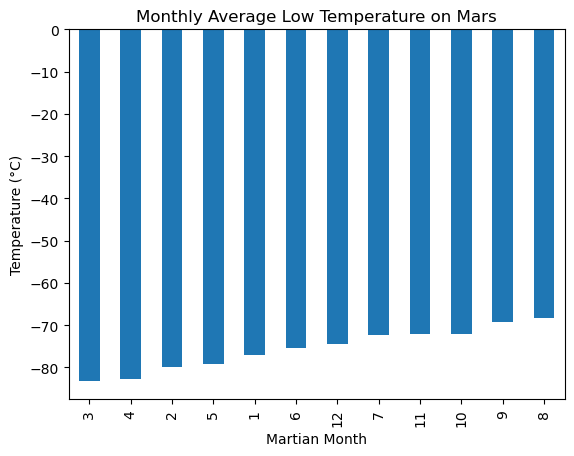

In [26]:
# Identify the coldest and hottest months in Curiosity's location
mars_coldest = mars_ave_min_temp.sort_values()
mars_coldest.plot(kind = 'bar',
                       xlabel='Martian Month',
                       ylabel='Temperature (°C)',
                       title = "Monthly Average Low Temperature on Mars"
                       )
plt.show()

In [27]:
# 4. Average pressure by Martian month
mars_ave_p = mars_climate.groupby(['month'])['pressure'].mean()
mars_ave_p

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: title={'center': 'Average Monthly Martian Atmospheric Pressure'}, xlabel='Martian Month', ylabel='Atmospheric Pressure (Pascals)'>

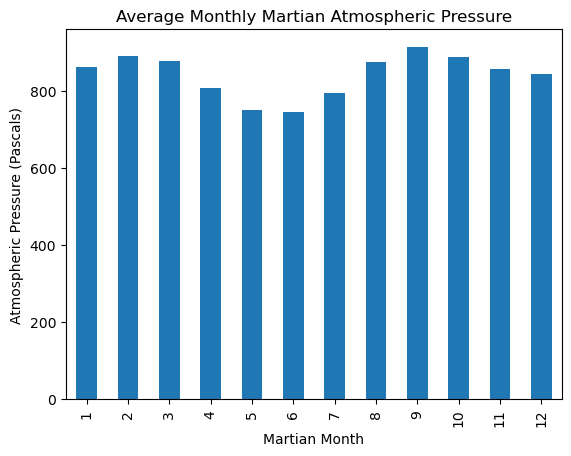

In [28]:
# Plot the average pressure by month
mars_ave_p.plot(kind = 'bar',
                       xlabel='Martian Month',
                       ylabel='Atmospheric Pressure (Pascals)',
                       title = "Average Monthly Martian Atmospheric Pressure"
                       )

<Axes: title={'center': 'Average Monthly Martian Atmospheric Pressure'}, xlabel='Martian Month', ylabel='Atmospheric Pressure (Pascals)'>

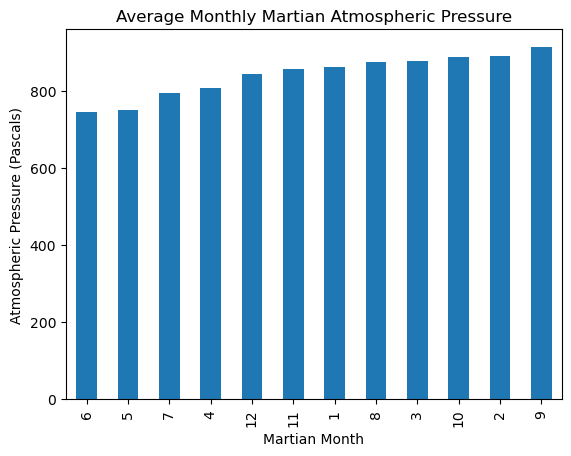

In [29]:
# Average Martian atmospheereic pressures plotted from low to high
mars_lowest_p = mars_ave_p.sort_values()
mars_lowest_p.plot(kind = 'bar',
                       xlabel='Martian Month',
                       ylabel='Atmospheric Pressure (Pascals)',
                       title = "Average Monthly Martian Atmospheric Pressure"
                       )

<Axes: title={'center': 'Martian Annual Temperature Cycle Compared to Earth Days'}, xlabel='Days on Earth', ylabel='Martian Sol Lowest Temperature (°C)'>

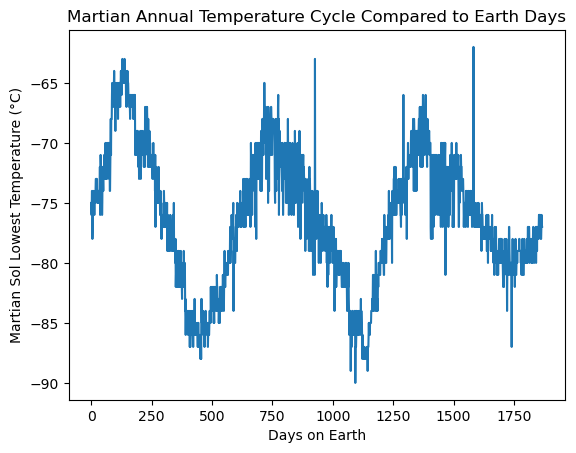

In [30]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_climate['min_temp'].plot(xlabel="Days on Earth",
                              ylabel= "Martian Sol Lowest Temperature (°C)",
                              title = "Martian Annual Temperature Cycle Compared to Earth Days"
                            )

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
    * There are 12 unique Martian months
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
    * There are 1867 Sols of data
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Coldest: month 3
    * Warmest: month 8
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Lowest pressure: month 6
    * Highest pressure: month 9
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Condiering the plot of the minimum temps over 1867 sols, it looks like the Martian year is similar to 675 Earth days


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [38]:
# Write the data to a CSV
# Check if directory exists, if not, make new directory
import os
import pathlib as Path

if not os.path.exists("Output_data"):
    os.mkdir("Output_data")
    output_path = os.path.join(os.getcwd(),'Output_data')
    print("Created directory" + output_path)
else:
    output_path = os.path.join(os.getcwd(),'Output_data')
    print(f"{output_path} directory already exists")
 
# Export the City_Data into a csv
mars_climate.to_csv("Output_data/mars_climate.csv", index=False)

/Users/michaelnaffziger/Desktop/Homework UO Bootcamp/python-web-challenge/src/Output_data directory already exists


In [39]:
# check csv open

mars_csv = pd.read_csv("output_data/mars_climate.csv")
mars_csv

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [40]:
browser.quit()